In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
from sklearn.base import clone 
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.ensemble import RandomForestClassifier


from random import randint

### Class-wise data exploration

In [2]:
# Get Data from File
csv_filename = "qc aggregated data.csv"
df = pd.read_csv(csv_filename)

# Specify Input and Output from Data
input_columns = ["tempmax", "tempmin", "temp", "feelslikemax", "feelslikemin", "feelslike", "dew", "humidity", "windspeed"]
output_column = ["conditions"]
df = df[input_columns + output_column]

max_count = 0
all_conditions = list(df.conditions.unique())

for condition in df.conditions.unique():
    num_per_class = len(df[df.conditions == condition])
    print(f"{condition} : {num_per_class}")
    if num_per_class > max_count:
        max_count = num_per_class

new_data = []

for condition in df.conditions.unique():
    num_per_class = len(df[df.conditions == condition])
    t_l = df[df.conditions == condition].to_numpy().tolist()
    print(condition)
    print(len(t_l), num_per_class, max_count-len(t_l))
    for rem in range(max_count-len(t_l)):
        t_l.append(t_l[randint(0, num_per_class)])

    new_data.extend(t_l)
    print(len(t_l), num_per_class, max_count-len(t_l), "New Data Len: ", len(new_data))

new_data = np.array(new_data)

Y = new_data[:, len(new_data[0])-1]
X = new_data[:, :len(new_data[0])-1]

### MNIST Experimentation - No Augmentation

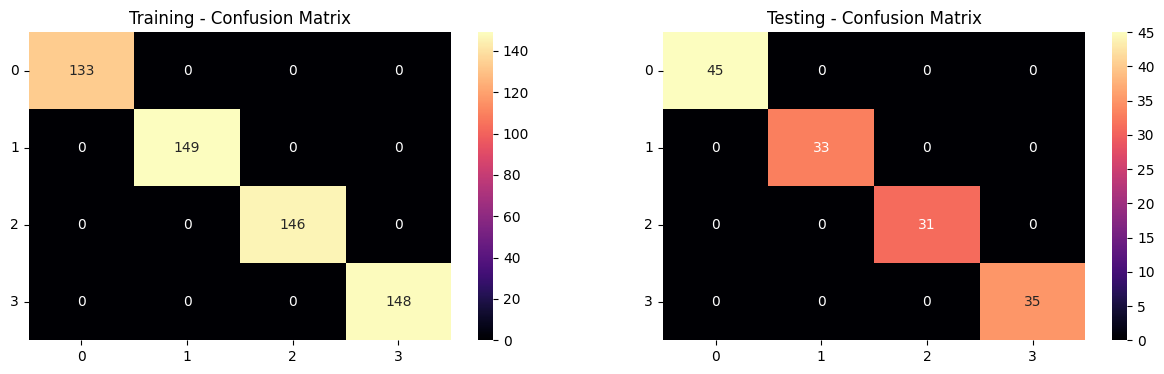

Testing: 1.0 
Training: 1.0


In [ ]:
A = load_digits(n_class=4)
X = A.data 
Y = A.target 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

r_forest = RandomForestClassifier(verbose=0)

model = Pipeline(
    steps = [
        ('rfc', clone(r_forest))
    ]
)

model.fit(X_train, Y_train)

# Predict on training (for verification)
Y_pred_train = model.predict(X_train)
CM_train = confusion_matrix(Y_pred_train, Y_train)
train_acc = accuracy_score(Y_train, Y_pred_train)

# Testing Plot
plt.figure(figsize=(15, 4))
ax = plt.subplot(121)
ax.set_title("Training - Confusion Matrix")
sns.heatmap(CM_train, annot=True, cmap="magma", ax=ax, fmt='d')
plt.yticks(rotation=0)

# Predict on testing (for verification)
Y_pred_test = model.predict(X_test)
CM_test = confusion_matrix(Y_pred_test, Y_test)
test_acc = accuracy_score(Y_test, Y_pred_test)

ax2 = plt.subplot(122)
ax2.set_title("Testing - Confusion Matrix")
sns.heatmap(CM_test, annot=True, cmap="magma", ax=ax2, fmt='d')
plt.yticks(rotation=0)

plt.show()
print(f"Testing: {test_acc} \nTraining: {train_acc}")

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


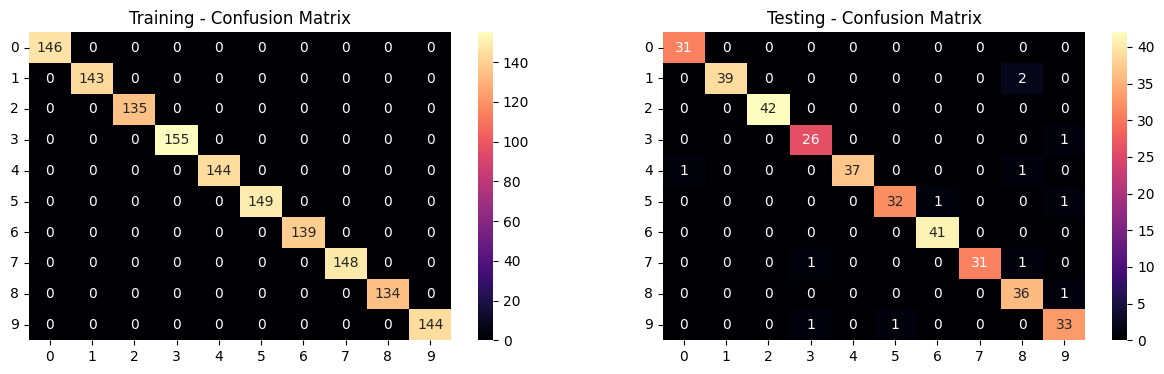

Testing: 0.9666666666666667 
Training: 1.0


### MNIST Experimentation

In [ ]:
a = load_digits()
X = a.data
Y = a.target
reshape_width = 8

In [ ]:
len(X)

1797

In [ ]:
test_x = np.reshape(X[0], (reshape_width, reshape_width))
test_x = np.pad(test_x, pad_width=1)
for x in range(reshape_width): test_x[:, x] = np.roll(test_x[:, x], 1)

test_x

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 15., 10., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  0.],
       [ 0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  2., 14.,  5., 10., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.,  0.]])

In [ ]:
test_x_shift = np.roll(test_x, 1)
test_x_shift 

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 13., 15., 10., 15.,  5.,  0.,  0.],
       [ 0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 12.,  0.,  0.,  8.,  8.,  0.,  0.],
       [ 0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.,  0.],
       [ 0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.],
       [ 0.,  0.,  2., 14.,  5., 10., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
a = load_digits()
X = a.data
Y = a.target
reshape_width = 8
new_X = []
new_Y = []
for idx, el in enumerate(X):

    pad_bounds = reshape_width // 2
    res_array = np.reshape(el, (reshape_width, reshape_width))

    # Padded - Normal
    padded_arr = np.pad(res_array, pad_width=pad_bounds)
    new_X.append(padded_arr)
    new_Y.append(Y[idx])
    #print(padded_arr)

    # Padded - Shifted - Horizontal
    for shift in range(-1 * (pad_bounds), pad_bounds + 1, 1):
        shifted_padded_arr = np.roll(padded_arr, shift)

        for v_shift in range(-1 * (pad_bounds), pad_bounds + 1, 1):
            sp_a = np.zeros((reshape_width * 2, reshape_width * 2))

            #print(sp_a.shape)

            for x in range(reshape_width * 2): 
                sp_a[:, x] = np.roll(shifted_padded_arr[:, x], v_shift)

            for y in range(4):
                sp_a_r = np.rot90(sp_a, y)
                new_X.append(sp_a_r)
                new_Y.append(Y[idx])
                print(idx, "/", len(X), y)
    



len(X), len(Y), len(new_X), len(new_Y), len(new_X) / len(new_Y)


0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1
0 2
0 3
0 0
0 1


KeyboardInterrupt: 

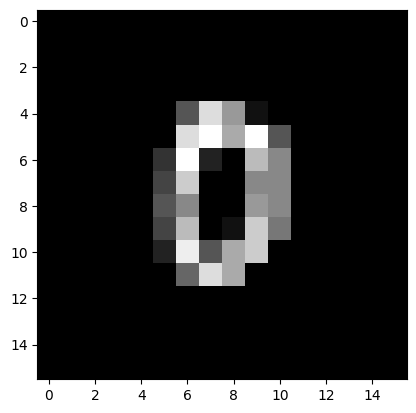

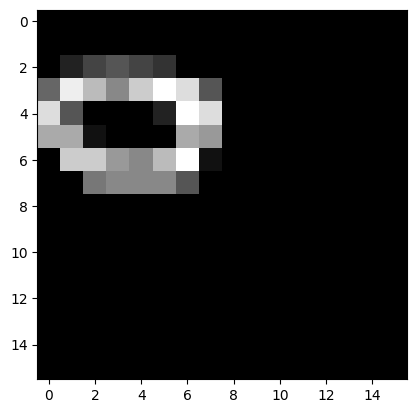

In [ ]:
plt.imshow(new_X[0], cmap="gray")
plt.show()
plt.imshow(new_X[72], cmap="gray")
plt.show()